# ENSEMBLE MODELS

1. Random Forest
2. Gradient Boosting Machine (GBM)
3. XGBoost
4. Light GBM / Microsoft Product
5. Category Boosting (CatBoost) / yandex product

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [48]:
df= pd.read_csv("/Users/User/Hitters.csv")
df= df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y= df["Salary"]
X_= df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N" ]]], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=42)

# <b>1. Random Forest<b/> 
(First step to ensemble methods)

    The goal is to combine t predicted values produced by t decision trees
    
1. based on Bootstraping method
2. drops RMSE value
3. increases correct classification ratio
4. drops variance and enduring againist overfitting.
    

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor().fit(X_train, y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

339.2719029658862

***Model Tuning***

In [51]:
rf_params = {"max_depth":[5, 8, 10], 
             "max_features":[2,5,10], 
             "n_estimators":[200,500,1000,2000], 
             "min_samples_split":[2,10,80,100]}

In [52]:
# This model tuning process lasted longer than all others, b/c (3*3*4*4)*10 cv would cause 1440 fits process.

rf_cv_model = GridSearchCV(RandomForestRegressor(), rf_params, cv=10, n_jobs=-1, verbose=2)
rf_cv_model = rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 19.7min finished


In [53]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

***Final Model***

In [54]:
rf_tuned = RandomForestRegressor(max_depth=5, max_features=2, min_samples_split=2, n_estimators=500).fit(X_train, y_train)

- Let's visualize the significance level of variables

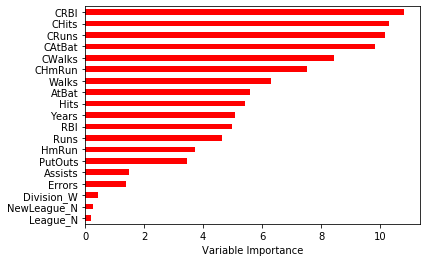

In [55]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## <b>2. Gradient Boosting Machine (GBM)<b/>
    
Artiklar uzerine tek bir tahminsel model formunda olan modeller serisi olusturulur. \
Zayif siniflandiricilarin bir araya gelip guclu bir siniflandirici olusturmasi fikrini hayata geciren algoritmadir.\
(Adaptive Boosting : AdaBoost)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

347.2899690031473

***Model Tuning / Model Optimization***

In [58]:
GBM_params = {"learning_rate":[ 0.001, 0.01, 0.1, 0.5],
             "max_depth":[3,5,8,10],
             "n_estimators":[100,200,500],
             "subsample":[1, 0.5, 0.8],
             "loss":["ls","lad","quartile"]}

In [59]:
GBM_cv_model = GridSearchCV(GradientBoostingRegressor(), 
                            GBM_params, 
                            cv=10, n_jobs=-1, 
                            verbose=2).fit(X_train, y_train)
# this process will take time to fit 4320

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1625 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2658 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3773 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 14.1min finished


In [60]:
GBM_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 1}

***Final Model***

In [61]:
GBM_tuned = GradientBoostingRegressor(learning_rate=0.1, loss="ls", max_depth=8, n_estimators=200, subsample=0.5).fit(X_train, y_train)

In [62]:
y_pred = GBM_tuned.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(y_test, y_pred))

332.48228444409443

***Variable Significance Level***

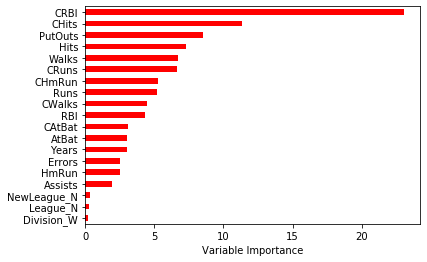

In [64]:
Importance = pd.DataFrame({'Importance':GBM_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## <b>3. XGBoost</b>

- Developed 2014

It is scalable and fast.
Its prediction success rate is high.

In [65]:
!pip install XGBoost

In [66]:
# import xgboost
from xgboost import XGBRegressor

In [67]:
xgb_model = XGBRegressor().fit(X_train, y_train)
xgb_model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

332.48228444409443

***Model Tuning / Model Optimization***

In [69]:
xgb_params = {"learning_rate":[0.01, 0.1, 0.5],
             "max_depth":[3,5,8,10],
             "n_estimators":[100,200,500],
             "colsample_bytree":[0.4, 0.7, 1]
             }

In [70]:
xgb_cv_model = GridSearchCV(XGBRegressor(), xgb_params, cv=10, verbose=2, n_jobs=-1 )
xgb_cv_model = xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.4min finished


In [71]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 500}

***Final Model***

In [72]:
xgb_tuned = XGBRegressor(colsample_bytree=0.4, learning_rate=0.01,max_depth=10, n_estimators=500).fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.4695646812929

***variable significance level***

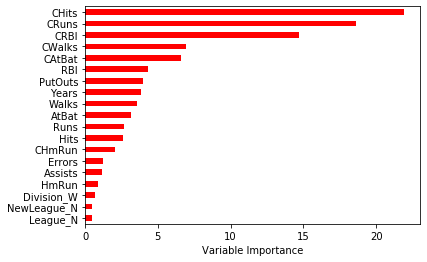

In [73]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# <b>4. Light GBM<b/>

- This is  another GBM that seeks increase the performance of training suration.
- Its performance is better
- It has Leaf-wise growth strategy instead of Level-wise growth // Leaf-wise growth: karar agaclari odakli, Level-wise growth: split odakli
- It has Depth-first Search(DFS) instead of Breadth-first Search (BFS)

In [74]:
!pip install lightgbm

In [75]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor().fit(X_train, y_train)
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

***Model Tuning***

In [77]:
lgb_params = {"learning_rate":[0.01, 0.1, 0.5,1],
             "max_depth":[1,2,3,4,5,6,7,8,9,10],
             "n_estimators":[20,40,100,200,500,1000],
             }

In [78]:
lgb_cv_model = GridSearchCV(LGBMRegressor(),lgb_params,cv=10, n_jobs=-1, verbose=2)
lgb_cv_model = lgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.4min finished


In [79]:
lgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

***Final Model***

In [80]:
lgb_tuned = LGBMRegressor(learning_rate=.1, max_depth=6, n_estimators=20).fit(X_train, y_train)
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

***Category Booting (CatBoost)***

Developed in 2017 by Yandex

- It is a type of GBM tackling categorical variables authomatically and quickly.
- Categorical Variable support
- Fast scalable GPU support
- Fast train fast predict
- First open-source code of Russia


In [81]:
!pip install catboost

In [82]:
from catboost import CatBoostRegressor

catb_model = CatBoostRegressor().fit(X_train, y_train)
catb_model

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 8.32ms	remaining: 8.31s
1:	learn: 432.4168868	total: 15.3ms	remaining: 7.66s
2:	learn: 426.3836690	total: 22ms	remaining: 7.32s
3:	learn: 420.2261014	total: 28.9ms	remaining: 7.19s
4:	learn: 414.9976675	total: 35.5ms	remaining: 7.07s
5:	learn: 409.6125323	total: 38.6ms	remaining: 6.4s
6:	learn: 403.9277911	total: 41.8ms	remaining: 5.92s
7:	learn: 398.4395285	total: 45.1ms	remaining: 5.6s
8:	learn: 392.4517081	total: 48.3ms	remaining: 5.31s
9:	learn: 387.4871123	total: 51.5ms	remaining: 5.09s
10:	learn: 382.6230510	total: 54.6ms	remaining: 4.91s
11:	learn: 378.1012454	total: 58.1ms	remaining: 4.78s
12:	learn: 372.6002306	total: 61.2ms	remaining: 4.64s
13:	learn: 368.4682192	total: 63.7ms	remaining: 4.49s
14:	learn: 364.0565766	total: 65.7ms	remaining: 4.31s
15:	learn: 359.5683249	total: 67.9ms	remaining: 4.18s
16:	learn: 355.1782794	total: 70.1ms	remaining: 4.05s
17:	learn: 350.4689946	total: 72.4ms	remaining: 3.95s
18:	learn: 3

In [83]:
?CatBoostRegressor

Init signature:
CatBoostRegressor(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function='RMSE',
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    one_hot_max_size=None,
    random_strength=None,
    name=None,
    ignored_features=None,
    train_dir=None,
    cus

***Model Tuning***

In [84]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.1],
              "depth":[3,6,8]}

In [85]:
catb_cv_model = GridSearchCV(CatBoostRegressor(),catb_params, cv=5, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


0:	learn: 425.7900818	total: 1.57ms	remaining: 312ms
1:	learn: 404.8723520	total: 2.8ms	remaining: 277ms
2:	learn: 387.4057666	total: 3.84ms	remaining: 252ms
3:	learn: 372.2801584	total: 4.92ms	remaining: 241ms
4:	learn: 358.9204229	total: 5.74ms	remaining: 224ms
5:	learn: 347.0083933	total: 6.44ms	remaining: 208ms
6:	learn: 336.0130818	total: 7.13ms	remaining: 197ms
7:	learn: 324.3923300	total: 7.87ms	remaining: 189ms
8:	learn: 314.8690957	total: 8.58ms	remaining: 182ms
9:	learn: 308.5075563	total: 9.34ms	remaining: 178ms
10:	learn: 298.8587285	total: 10ms	remaining: 172ms
11:	learn: 294.7655438	total: 10.7ms	remaining: 168ms
12:	learn: 288.0697862	total: 11.4ms	remaining: 164ms
13:	learn: 282.6697154	total: 12.3ms	remaining: 163ms
14:	learn: 277.6121667	total: 13.3ms	remaining: 164ms
15:	learn: 273.4383979	total: 14ms	remaining: 161ms
16:	learn: 269.1556201	total: 14.7ms	remaining: 159ms
17:	learn: 264.8098704	total: 15.4ms	remaining: 156ms
18:	learn: 261.6700768	total: 16.1ms	remain

In [86]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

***Final Model***

In [87]:
catb_tuned= CatBoostRegressor(depth=3,iterations=200,learning_rate=0.1).fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0:	learn: 425.7900818	total: 2.77ms	remaining: 551ms
1:	learn: 404.8723520	total: 5.75ms	remaining: 569ms
2:	learn: 387.4057666	total: 7.17ms	remaining: 471ms
3:	learn: 372.2801584	total: 8.58ms	remaining: 421ms
4:	learn: 358.9204229	total: 10ms	remaining: 391ms
5:	learn: 347.0083933	total: 11.5ms	remaining: 371ms
6:	learn: 336.0130818	total: 12.8ms	remaining: 353ms
7:	learn: 324.3923300	total: 14.1ms	remaining: 338ms
8:	learn: 314.8690957	total: 15.6ms	remaining: 331ms
9:	learn: 308.5075563	total: 17ms	remaining: 323ms
10:	learn: 298.8587285	total: 18.4ms	remaining: 316ms
11:	learn: 294.7655438	total: 19.8ms	remaining: 310ms
12:	learn: 288.0697862	total: 21.2ms	remaining: 305ms
13:	learn: 282.6697154	total: 22.7ms	remaining: 301ms
14:	learn: 277.6121667	total: 24.1ms	remaining: 297ms
15:	learn: 273.4383979	total: 25.6ms	remaining: 295ms
16:	learn: 269.1556201	total: 27.1ms	remaining: 292ms
17:	learn: 264.8098704	total: 28.5ms	remaining: 289ms
18:	learn: 261.6700768	total: 29.5ms	remai

344.3125832615482